/var/folders/ss/g73jrmvs7d108fqxld50xgxw0000gn/T/ipykernel_41542/2883681520.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['latitude'][row] = location.latitude
/var/folders/ss/g73jrmvs7d108fqxld50xgxw0000gn/T/ipykernel_41542/2883681520.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['longitude'][row] = location.longitude
/var/folders/ss/g73jrmvs7d108fqxld50xgxw0000gn/T/ipykernel_41542/2883681520.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

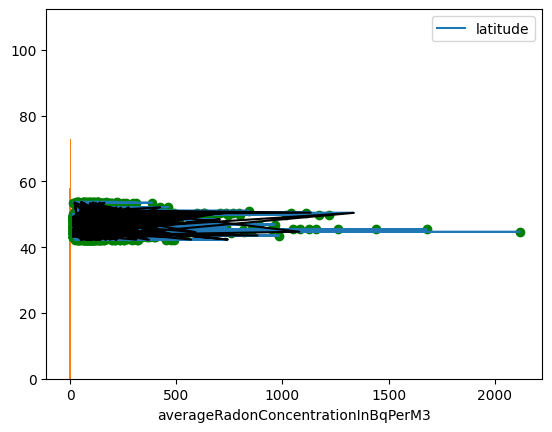

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pgeocode
nomi = pgeocode.Nominatim('ca')


## Dataset 1: Government Radon and Thoron Data

# New columns to store latitude and longitude
df = pd.read_csv('discovery/data/radon-thoron.csv', encoding='latin-1')

df["latitude"] = np.nan
df["longitude"] = np.nan

for row in df.index:
    location = nomi.query_postal_code(df['forwardSortationAreaCodes'][row])
    df['latitude'][row] = location.latitude
    df['longitude'][row] = location.longitude

df.head()

# Remove Naan values for plotting purposes
df = df.dropna()

# Basic scatter plot
df.plot('averageRadonConcentrationInBqPerM3', 'latitude')

# Creating test and training data
x_train, x_test, y_train, y_test = train_test_split(df.averageRadonConcentrationInBqPerM3, df.latitude, test_size = 0.2)

# Creating linear regression
regr = LinearRegression()
regr.fit(np.array(x_train).reshape(-1,1), y_train)

preds = regr.predict(np.array(x_test).reshape(-1,1))
y_test.head()
preds

residuals = preds - y_test
plt.hist(residuals)

mean_squared_error(y_test, preds) ** 0.5

plt.scatter(x_train, y_train,color='g') 
plt.plot(x_test, y_test, color = 'k')
plt.show()


In [ ]:
## Dataset 2: 
